# Exercises for scientific computing 2023

For each lecture I prepared two exercises. I report here the numer of the exercise and the lectures.
[Giulia Fumagalli, # 825592, XXXVIII phd cycle]

## Lecture 1
    ### Es. 5
    

In [4]:
def n_letter_words(message, n):
    words = message.split()
    n_letters = [w for w in words if len(w) == n]
    return n_letters

def pangram(quote):
    foxquote = "The quick brown fox jumps over the lazy dog"
    alphabet = set(foxquote.replace(" ", "").lower())
    input_quote = set(quote.replace(" ", "").lower())
    if alphabet.issubset(input_quote):
        print('Yes, this is a pangram')
    else:
        print('Sorry, but this is not a pangram')

i = input('\nHello, welcome to the word of words! Here you can:\n\n * Check how many words with length n are present in your message: press 1\
     .\n * Check if your message is a pangram: press 2\n')

if i == '1':
    quote = input("Enter your message: ")
    n = input("Enter length of the words you want to find: ")
    try:
        n = int(n)
        print(n_letter_words(quote, n))
    except ValueError:
        print("Invalid input for word length. Please enter a valid integer.")
else:
    quote = input("Enter your message: ")
    pangram(quote)


['ciao', 'ciao']


    ###Es. 11

In [7]:
import random
def PSR():
    win_phrase = ['woo, you destroyed it!', 'Well done, human','The machine has been defeted! Good job.','You win!!' ]
    lose_phrase = ['Poor human, you cannot do anything against the machines.', 'You have been defeted','Ah-ah-ah you have lost so badly!','You lose!! Try again if you dare', ]
    want_to_play = ['Great','You are feeling brave','Wow, that is fantastic', 'Are you sure?' ]
    user_choice = input("Welcome to the duel! Do you want to compete with the most intelligent and advanced machine ? y / n ")

    wapons=['Rock' , 'Paper','Scissors']
    if user_choice =='y':
        print( random.choice(want_to_play))
        wu=input( "State you wapon: Rock (r), Paper (p) or Scissors (s).  ")
    def translate(i):
        if i =='r':
            j='Rock'
        elif   i =='p': 
            j='Paper'
        elif  i=='s':
            j='Scissors'
        else:
            j=None
        return j    
    i=0
    while translate(wu) in wapons:
        computer=random.choice(wapons)
        print("\n-----------------------------")
        print('GAME #', i)
        print("You vs Computer")
        print( translate(wu) +' X '+computer)
        print("------------------------------\n")    
            
        if wu == 'p':
            if computer == translate('r'): print(random.choice(win_phrase))
            elif computer == translate('p'): print('Parity! You did lose, but neither did the computer.')
            else: 
                print(random.choice(lose_phrase))  
                wu=None  
        if wu=='r':
            if computer==translate('s'): print(random.choice(win_phrase))
            elif computer==translate('r'): print('Parity! You did lose, but neither did the computer.')
            else: 
                print(random.choice(lose_phrase)) 
                wu=None
        if wu=='s':
            if computer==translate('p'): print(random.choice(win_phrase))
            elif computer==translate('s'): print('Parity! You did lose, but neither did the computer.')
            else:
                print(random.choice(lose_phrase)) 
                wu=None 
        if wu is not None:           
            wu=input( "\nState you wapon or leave the game: ")
        i=i+1

PSR()

Wow, that is fantastic

-----------------------------
GAME # 0
You vs Computer
Paper X Scissors
------------------------------

Ah-ah-ah you have lost so badly!


## Lecture 2
    ###Es.2
    

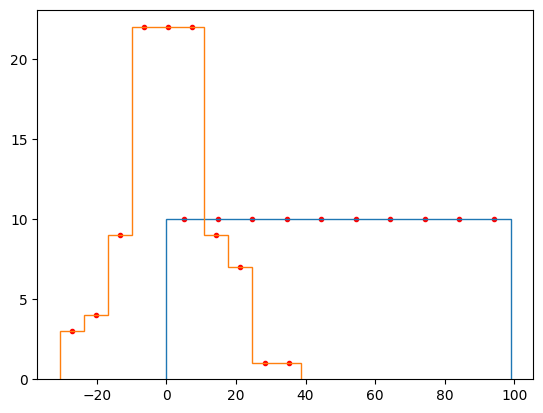

In [13]:
import numpy as np
import wget
import matplotlib.pyplot as plt
URL = "https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-3/sample.txt"
response = wget.download(URL, "sample.txt")
datas=np.loadtxt(response).T

for data in datas:
    bin_high,bin_edges=np.histogram(data, bins=int(10))
    for i in range(len(bin_high)):
        #print('the bin center is:',(bin_edges[i]+bin_edges[i+1])/2)
       # print('the bin count is:',(bin_high[i]))
        plt.plot((bin_edges[i]+bin_edges[i+1])/2,(bin_high[i]),'r.')
    
    plt.hist(data, bins=int(10),histtype= 'step',)

    ###Es. 6

[[0 1 1 0 1 0 1 0 0 1]
 [0 0 0 1 1 0 0 0 1 1]
 [1 0 1 0 0 0 1 0 0 0]
 [1 0 0 0 1 1 1 0 1 1]
 [1 0 0 1 1 1 0 1 1 1]
 [0 1 1 1 0 0 0 1 0 0]
 [1 0 1 0 1 0 0 1 1 1]
 [0 0 0 0 1 0 1 1 1 1]
 [0 0 1 1 1 0 0 0 0 1]
 [0 1 0 1 0 0 1 1 1 1]]


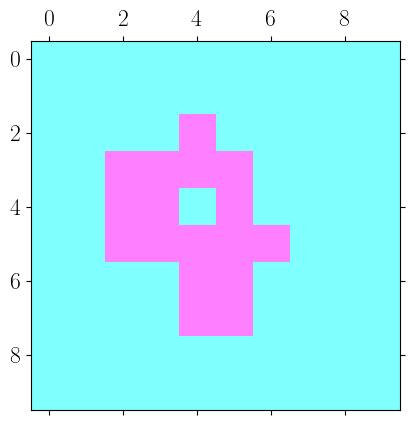

In [26]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def GOL(frame, img, table, nr,nc):
        next_table = np.copy(table)      
        for i in range (nr):
            for j in range (nc):
                ##BOUNDARIES
                #corners
                if i==0 and j==0: #top left coner
                      neighbours=[table[i,j+1],table[i+1,j+1],table[i+1,j]]
                elif  i==nr-1 and j==nc-1: #lower right corner
                      neighbours=[table[i,j-1],table[i-1,j-1],table[i-1,j]]
                elif  i==0 and j==nc-1: #lower right corner
                      neighbours=[table[i,j-1],table[i+1,j-1],table[i+1,j]]
                elif  i==nr-1 and j==0: #lower right corner
                      neighbours=[table[i,j+1],table[i-1,j+1],table[i-1,j]]
                #sides    
                elif (i==0 and j!=0 and j!=nc-1)  :   # 0 row j column
                     neighbours=[table[i,j+1],table[i,j-1],table[i+1,j],table[i+1,j+1],table[i+1,j-1]] 
                elif (j==0 and i!=0 and i!=nr-1 )  :   # 0 column j column
                     neighbours=[table[i+1,j],table[i-1,j],table[i,j+1],table[i+1,j+1],table[i-1,j+1]] 
                elif (i==nr-1 and j!=0 and j!=nc-1):   # 0 row j column
                     neighbours=[table[i-1,j],table[i-1,j-1],table[i-1,j+1],table[i,j-1],table[i,j+1]] 
                elif (j==nc-1 and i!=nr-1 and i!=0) :   # 0 column j column
                      neighbours=[table[i-1,j],table[i+1,j],table[i,j-1],table[i+1,j-1],table[i-1,j-1]]
                #middle    
                else:    
                       neighbours=[table[i,j+1],table[i+1,j+1],table[i+1,j],table[i-1,j],table[i,j-1],table[i-1,j-1],table[i-1,j+1],table[i+1,j-1]] #add terms 
                    
                alive=len(np.where(np.array(neighbours)==1)[0] )
                       
                if table[i,j]==1:
                   #Any live cell with two or three live neighbours lives on to the next generation
                   if alive>=2 and alive<=3:
                        next_table[i,j]=1 
                   #Any live cell with fewer than two live neighbours dies, as if by underpopulation.   
                   elif alive<2:
                        next_table[i,j]=0
                   #Any live cell with more than three live neighbours dies, as if by overpopulation.
                   elif alive>3:
                        next_table[i,j]=0
                else: 
                   #Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction
                    if  alive==3:
                        next_table[i,j]=1 
                    else:
                        next_table[i,j]=0 
        img.set_data(next_table)
        table[:] = (next_table) 
        return img
"""
#Blinker! It works
nr=5
nc=5
table = np.random.randint(1, size=(nr, nc))
table[2,1:-1]=1

#Still life! It works
nr=6
nc=6
table = np.random.randint(1, size=(nr, nc))
table[2,2:4]=1
table[3,2:4]=1
print(table)
"""
#random
nr=10
nc=10
table = np.random.randint(2, size=(nr, nc))
print(table)
#"""
fig, ax = plt.subplots()
snap = ax.matshow(table, cmap='cool',alpha=0.5)
anim = animation.FuncAnimation(fig, GOL, fargs=(snap, table, nr,nc),
                               frames=20, interval=150,)
#anim.save(filename="blinker.gif", writer="pillow")
#anim.save(filename="still_life.gif", writer="pillow")
#anim.save(filename="random.gif", writer="pillow")


## Lecture 3
For this lecture  one exercise is containted in Es.6 of lecture 2.


    ###Es. 4

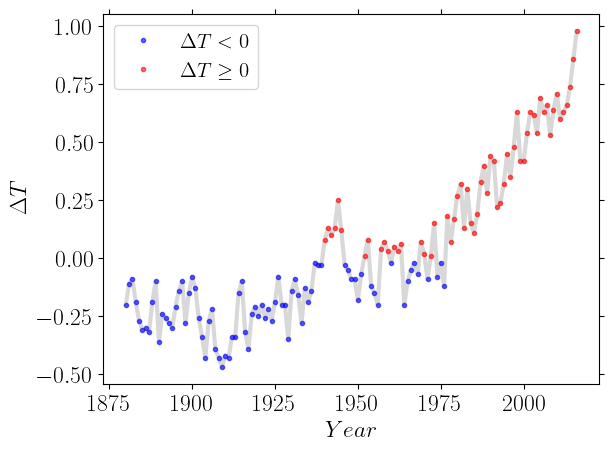

In [3]:
import numpy as np
import wget
import matplotlib.pyplot as plt
URL = "https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt"
response = wget.download(URL, "nasa-giss.txt")
datas=np.loadtxt(response).T
plt.rcParams.update({"text.usetex": True})
plt.rcParams['xtick.labelsize'] =17
plt.rcParams['ytick.labelsize'] = 17
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
c=[]
for i in range (0,len(datas[0])):
    c.append('r')
c_circ = ['k','grey']
levels = [90, 50]
ls=['dashed','solid']
fig, ax = plt.subplots()
ax.plot(datas[0],datas[1],'grey',lw=3,alpha=0.3)
cc=np.argwhere(datas[1]<0)
hh=np.argwhere(datas[1]>=0)
ax.plot(datas[0][cc],datas[1][cc],'b.',alpha=0.6,label='$\Delta T<0$' )
ax.plot(datas[0][hh],datas[1][hh],'r.',alpha=0.6,label='$\Delta T\geq 0$')
ax.tick_params(right=True, top=True, labelright=False,labeltop=False)
ax.set_xlabel('$Year$',fontsize=17)
ax.set_ylabel('$\Delta T$',fontsize=17)
ax.legend(fontsize=15)


## Lecture 4
    ### Es. 3

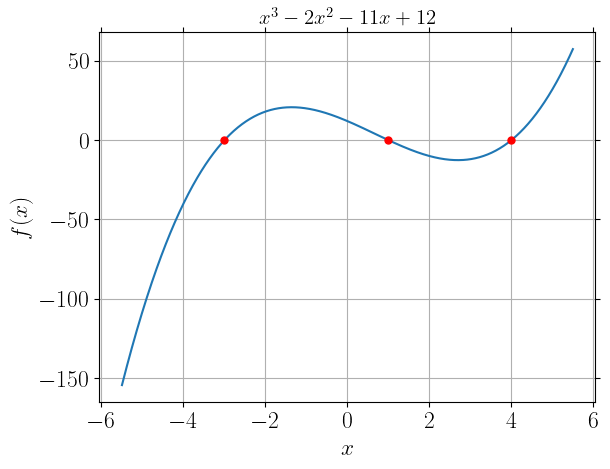

In [6]:
import scipy.optimize as optimize
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"text.usetex": True})
plt.rcParams['xtick.labelsize'] =17
plt.rcParams['ytick.labelsize'] = 17
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True

def f(x):
    return (x**3-2*x**2-11*x+12)
#Intervals obtained firstly plotting the function.    
low_int=[-5, 0, 2.5]  
high_int=[-2.5, 2.5, 5] 
roots=[]
for a,b in zip(low_int, high_int): roots.append((optimize.brentq(f, a, b, full_output=True))[0])

x = np.linspace(-5.5, 5.5, 1000)
fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.plot(np.array(roots), f(np.array((roots))),'r.',markersize=10)
ax.tick_params(right=True, top=True, labelright=False,labeltop=False)
ax.set_xlabel('$x$',fontsize=17)
ax.set_ylabel('$f(x)$',fontsize=17)
ax.set_title('$x^3-2x^2-11x+12$',fontsize=15)
ax.grid()

    ### Es. 5

0.387098 0.206
0.7233 0.007
1 0.017
1.5273 0.093


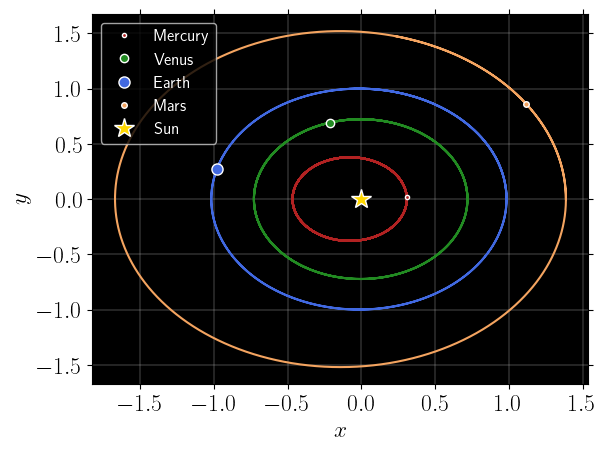

In [9]:
import scipy
import matplotlib as mpl
import numpy as np
import random

def rhs_orbit(X, t):
    r = (X[0]**2 + X[1]**2)**0.5
    dxdt = X[2]
    dydt = X[3]
    dvxdt = -4*np.pi*X[0]/r**3
    dvydt = -4*np.pi*X[1]/r**3
    return np.array([dxdt, dydt, dvxdt, dvydt])

plt.rcParams['axes.facecolor'] = 'black'
mpl.rcParams.update({'text.color': "white"})
a_planets = [0.387098, 0.7233, 1, 1.5273]  # Removed extra comma
e_planets = [0.206, 0.007, 0.017, 0.093]
fig, ax = plt.subplots()
planets = ['Mercury', 'Venus', 'Earth', 'Mars']
c = ['firebrick', 'forestgreen', 'royalblue', 'sandybrown']
m = [3, 6, 8, 4]
i = 0
for a, e in zip(a_planets, e_planets):
    print(a, e)
    x0 = a * (1 - e)
    y0 = 0
    vx0 = 0
    vy0 = np.sqrt((4 * np.pi/a) * (1 + e)/(1 - e))
    X = [x0, y0, vx0, vy0]
    t = np.linspace(0, 4, 100000)

    def _compute(X, t):
        ODEsolution = scipy.integrate.odeint(rhs_orbit, X, t)
        return ODEsolution

    ODEsolution = np.array(list(map(_compute, [X], [t])))
    ax.plot(ODEsolution.T[0], ODEsolution.T[1], c=c[i])
    p = random.randint(0, len(ODEsolution.T[0]))
    ax.plot(ODEsolution.T[0][p], ODEsolution.T[1][p], 'o', c=c[i], markersize=m[i], markeredgecolor='w', label=planets[i])
    i = i + 1

ax.plot(0, 0, '*', c='gold', markersize=15, markeredgecolor='w', label='Sun')

ax.tick_params(right=True, top=True, labelright=False, labeltop=False)
ax.grid(True, lw=0.3)
ax.set_xlabel('$x$', fontsize=17)
ax.set_ylabel('$y$', fontsize=17)
ax.legend(fontsize=12)


## Lecture 5
In this folder you can find the mathematica notebook with all the exercises done.

## Lecture 6
https://github.com/gfumagalli?tab=repositories

## Lecture 7
    ###Es. 2

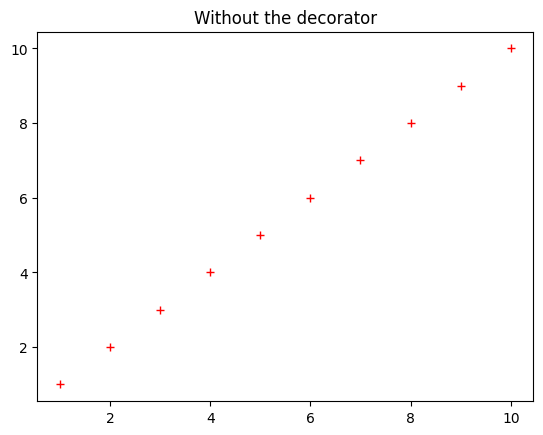

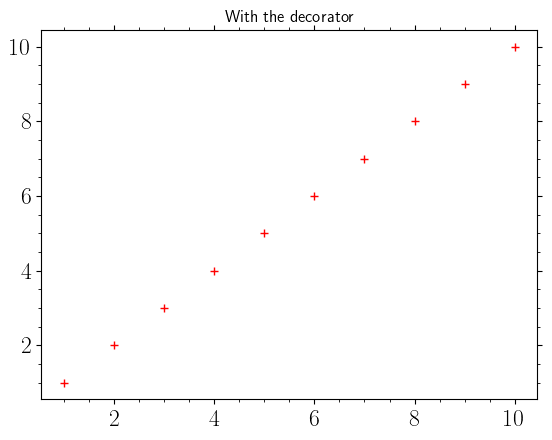

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np

def my_decorator(func):
    def wrapper(*args, **kwargs):
        #print("Hi! This is before")
        plt.rcParams.update({"text.usetex": True})
        plt.rcParams['xtick.labelsize'] = 17
        plt.rcParams['ytick.labelsize'] = 17
        plt.rcParams['ytick.left'] = True
        plt.rcParams['ytick.right'] = True
        plt.rcParams['xtick.top'] = True
        plt.rcParams['xtick.bottom'] = True
        plt.rcParams['ytick.labelleft'] = True
        plt.rcParams['ytick.labelright'] = False
        plt.rcParams['xtick.labeltop'] = False
        plt.rcParams['xtick.labelbottom'] = True
        plt.rcParams['axes.facecolor'] = 'white'

        f = func(*args, **kwargs)
        #print("Hi again! This is after")     
        ax = plt.gca() 
        plt.minorticks_on()

        return f

    return wrapper

def plot_without_decorator(a, b):
    fig, ax = plt.subplots()
    ax.plot(a, b, 'r+')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.set_title('Without the decorator')
    
a = np.arange(1,11,1)
b = np.arange(1,11,1)

#plot_without_decorator(10**np.array(a), 10**np.array(b))
plot_without_decorator(np.array(a), np.array(b))

@my_decorator
def plot_with_decorator(a, b):
    fig, ax = plt.subplots()
    ax.plot(a, b, 'r+')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.set_title('With the decorator')
#plot_with_decorator(10**np.array(a), 10**np.array(b))
plot_with_decorator(np.array(a), np.array(b))

    ###Es.3 
    
    

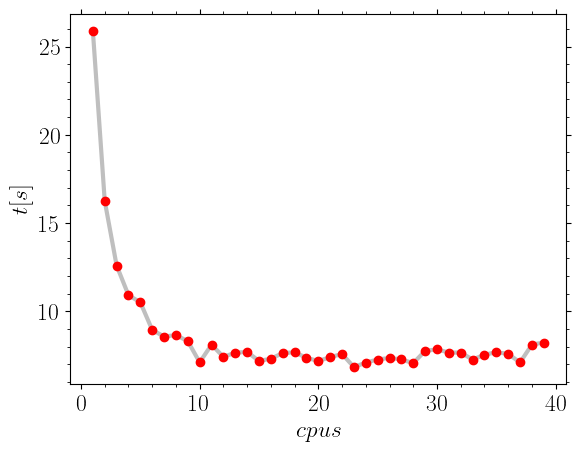

In [23]:

import numpy as np
import my_decorator
#############################################################################################################################
# This code allow to progate backward the binaries detect from LVK in GWTC-1, 2.1, 3. We selct just BBH with a FAR < 1 year 
# and a p_astro > 0.5. (To be checked with Isobel). We cosider the posteriors of the angles theta1, theta2, deltaphi  at detection
# frequency of 20 Hz (with some exeption), we assign to each bianry an eccentricity (0<=e<=0.05) and propagate them backward
# untill all the binaries have reached the same semi major axis (To be checked with Isobel). 
# We then save the new posteriors in new files and they are ready to be plotted against the circular back propagation.
#############################################################################################################################
"""
import glob
import sys, os, json, math
import matplotlib.pyplot as plt
import h5py
from importlib.machinery import SourceFileLoader
precession_circ = SourceFileLoader("precession", "/data/gfumagalli/new/precession/precession-latest.py").load_module()
precession_ecc = SourceFileLoader("precession_ecc", "/data/gfumagalli/new/precession/precession-latest-ecc.py").load_module()
from tqdm import tqdm
import multiprocessing, pathos.multiprocessing
import corner
import seaborn as sns
import bilby
gwevents ={ 'GWTC-1': [	
'GW170818',	
],'GWTC-2.1':[
 'GW190814',],'GWTC-3':['GW200316_215756',
 ]}

def get_posterior(event, n_samples, rng):
    lvc_dir = '/data/mmould/xwing/lvc'
    gwfiles = {
        'GWTC-1': {
            event: glob.glob(f'{lvc_dir}/GWTC-1_bilby/{event}*')[0]
            for event in gwevents['GWTC-1']
            },
        'GWTC-2.1': {
            event: glob.glob(f'{lvc_dir}/GWTC-2.1/*{event}*.h5')[0]
            for event in gwevents['GWTC-2.1']
            },
        'GWTC-3': {
            event: glob.glob(f'{lvc_dir}/GWTC-3/*{event}*_cosmo.h5')[0]
            for event in gwevents['GWTC-3']
            },
        }
    
    close = True
    
    if event in gwevents['GWTC-1']:
        close = False
        h = bilby.result.read_in_result(filename=gwfiles['GWTC-1'][event])
        p = h.posterior
    if event in gwevents['GWTC-2.1']:
        h = h5py.File(gwfiles['GWTC-2.1'][event], 'r')
        p = h['C01:Mixed']['posterior_samples']
        
    elif event in gwevents['GWTC-3']:
        h = h5py.File(gwfiles['GWTC-3'][event], 'r')
        p = h['C01:Mixed']['posterior_samples']
        
    n_total = p.shape[0]
    
    if n_samples is None:
        idx = np.arange(n_total)
    else:
        _idx = np.arange(n_total)
        idx = rng.choice(_idx, n_samples, replace=False)
        
    posterior = {}
    pars = [
        'mass_ratio', 'a_1', 'a_2', 'tilt_1', 'tilt_2',
        'phi_12', 'total_mass',
        ]
    
    for par in pars:
        posterior[par] = np.asarray(p[par][idx])
        
    if close:
        h.close()
    del p, h
    return posterior

def result( theta1, theta2, deltaphi,a,e0, q, chi1,chi2):
    t1,t2,dp=np.ones(1),np.ones(1),np.ones(1)
    try:
        res=precession_ecc.inspiral_precav(theta1=
                theta1,theta2= theta2, deltaphi=deltaphi,
               a=a,e=e0, q=q, chi1=chi1,chi2=chi2)
        if e0==0:
            chip=precession_ecc.eval_chip_averaged(kappa=res['kappa'][:, -1][0], a=res['a'][:, -1][0], e=0, chieff=res['chieff'][0], q=q, chi1=chi1, chi2=chi2)
            e,t1,t2,dp,chieff,chip=e0,res['theta1'][:, -1][0],res['theta2'][:, -1][0],res['deltaphi'][:, -1][0],res['chieff'][0],chip[0]
        else: 
            chip=precession_ecc.eval_chip_averaged(kappa=res['kappa'][:, -1][0], a=res['a'][:, -1][0], e=res['e'][:, -1][0], chieff=res['chieff'][0], q=q, chi1=chi1, chi2=chi2)
            e,t1,t2,dp,chieff,chip=res['e'][:, -1][0],res['theta1'][:, -1][0],res['theta2'][:, -1][0],res['deltaphi'][:, -1][0],res['chieff'][0],chip[0]   
    except :
         e,t1,t2,dp,chieff,chip=np.nan,np.nan,np.nan,np.nan,np.nan,np.nan
    return e,t1,t2,dp,chieff,chip
    
def backprop(event,e,af, n_sample=None, seed=42,ncpus=None):
    
    out_dir = '/data/gfumagalli/new/eccentric_tilts/data/10^4/'+str(e)+'/'
    rng = np.random.default_rng(seed)
    d = get_posterior(event, n_samples=n_sample,  rng= rng)
    f_ref = 11.0 if event == 'GW190521' else 20.0
    p = d 
    n = p['mass_ratio'].size
    p['theta1'] = p['tilt_1']
    p['theta2'] = p['tilt_2']
    p['deltaphi'] = p['phi_12']
    p['q'] = p['mass_ratio']
    p['chi1'] = p['a_1']
    p['chi2']= p['a_2']
    p['Mdet'] = p['total_mass']
    p['f_ref'] = np.ones(n) * f_ref
    p['e']=np.ones(n) *e
    a0 = precession_ecc.gwfrequency_to_pnseparation(
        p['theta1'], p['theta2'], p['deltaphi'], p['f_ref'], p['q'], p['chi2'], p['chi2'],p['Mdet'],
        )[0]
    a = np.geomspace(a0,af)
    p['a'] = a
    p['theta1stop'] = np.zeros(n)
    p['theta2stop'] = np.zeros(n)
    p['deltaphistop'] = np.zeros(n)
    if ncpus==None:
        CPUS=int(multiprocessing.cpu_count()/2)
        print(CPUS)
    else:
        CPUS=ncpus 
    parmap = pathos.multiprocessing.ProcessingPool(CPUS).imap

    res =np.array(list(tqdm(parmap(result,
            p['theta1'], p['theta2'], p['deltaphi'],
             precession_ecc.tiler(p['a'],p['theta1']), p['e'], p['q'], p['chi1'], p['chi2']))))
    #print(res)
    p['estop'] = res.T[0]
    p['theta1stop'] = res.T[1]
    p['theta2stop'] = res.T[2]    
    p['deltaphistop'] =res.T[3]    
    p['chieffstop'] =res.T[4]    
    p['chipstop'] =res.T[5]    
    #print(p['estop'])
    newpar=['theta1','theta2','deltaphi','chi1','chi2','q','a','e','estop','theta1stop','theta2stop','deltaphistop','chieffstop','chipstop']
    with h5py.File(out_dir+event, 'w') as h:
        for par in newpar:
                    h.create_dataset(
                    par, data=p[par], compression='gzip',
                    compression_opts=9, )
    return None

events = [ 'GW190814']
import time
ee=[0]
CPUS=int(multiprocessing.cpu_count()/2)
t=[]
print(CPUS)
for n in range(1,40):
    for event in events:
        print(event)
        start_time = time.time()
        Resul=backprop(event,0,1e4, n_sample=100, seed=42,ncpus=n) ##usign just a portion of the avaible semples and CPUS
        print("-- %s seconds --" % (time.time() - start_time))
        t.append((time.time() - start_time))
np.save('time.npy', t)
"""
cpus=np.arange(1,40)
t= np.load('time.npy')
@my_decorator.my_decorator
def plot(cpus,t):
    plt.plot(cpus, t,'grey',alpha=0.5, lw=3)
    plt.plot(cpus, t,'ro')
    plt.xlabel('$cpus$')
    plt.ylabel('$t [s]$')
    
plot(cpus,t)

## Lecture 8
    ###Es. 1

In [17]:
#%pip install -i https://test.pypi.org/simple/ mygame-psr-computingclass
import mygame_psr_computingclass as psr
from importlib import reload #on jupyter notbook this is not necessary, Idk why here I need it
reload(mygame_psr_computingclass)
psr.PSR()

Great

-----------------------------
GAME # 0
You vs Computer
Rock X Paper
------------------------------

You have been defeted


    ### Es.4

![Before](before.png)


![After](after.png)